# To be completed at the Live Session and in your own time.

These set of examples we will help you get familiar with non parametric tests and correlations within a Jupyter notebook.   The questions coloured green are important practice for CA, particularly CA 2.

Before attempting these examples, please ensure you have read through [Chapter 7 Jupyter Notebook](https://github.com/haleygomez/Data-Analysis-2021/blob/master/blended_exercises/Chapter7/Chapter7.ipynb) and have completed the Learning Central **Chapter 7 quiz**. 

***

In [2]:
import numpy as np
from matplotlib import pyplot as plt


# MCMC

## <font color=#30a64d>Question</font>

In Chapter 6, we saw that Professor Dumbledore, studying the extinction of dragons, discovers a new set of egg remnants in an unexplored valley in Madagascar. The remnants are radio carbon dated and found to have the following ages in years:

2141.22, 1781.15, 1523.37, 1816.90, 1932.29, 1541.21, 720.782, 1026.22, 1687.22, 2460.59

Professor Snape however did a previous study in the next valley where he found eggs that were on average 1200 years old, following a normal distribution with standard deviation of 300 years. 

- Write an MCMC algorithm from scratch and use it to create a posterior distribution for the mean age of the eggs. What is the mean and variance for the posterior using your MCMC distribution?

- Check the MCMC has converged.

- How does this compare with the analytical values you derived in Chapter 6?

### Answer

*Your answer here*

In [35]:
from scipy.stats import norm
%matplotlib inline
from tqdm.notebook import tqdm
# from last week - analytical values

posterior_mean= 1568.7329
posterior_std= 135.4208

data = np.array([2141.22, 1781.15, 1523.37, 1816.90, 1932.29, 1541.21, 720.782, 1026.22, 1687.22, 2460.59])

# define a function for the probability
# prob(posterior) = normal(likelihood) x normal(prior)
def posterior(theta,data=data): 
    X_hat=np.mean(data)
    n = len(data)
    var = np.std(data)**2
    sig = np.sqrt(var)/np.sqrt(n)
    mu_0 =1200
    s_0 = 300
    A = 1./(sig*np.sqrt(2*np.pi))
    B= (theta - X_hat)**2./(2*sig**2.)    
    A_prior = 1./(s_0*np.sqrt(2*np.pi))
    B_prior= (theta - mu_0)**2./(2*s_0**2.)
    val = norm.pdf(theta,X_hat,sig)*norm.pdf(theta,mu_0,s_0)
    return val


# set up MCMC step paramaters
N_mcmc = 1000
theta_current = np.zeros(N_mcmc+1)
# use our prior as a guess
theta_current[0] = np.mean(data)

# choose a value for width of normal distribution to get the step in height
# this is between the prior and the likelihood values
sigma_mcmc = 150

for i in tqdm(range(N_mcmc)):
    p_current = posterior(theta_current[i]) # put current value in posterior equation
    dtheta = np.random.normal(0,sigma_mcmc) # randomally draw a value of theta to trial 
    theta_proposed = theta_current[i] + dtheta #get new proposed theta (random theta + stepsize)
    p_proposed = posterior(theta_proposed) # calculate posterior p for proposed theta
    
    #  keep this value if probability proposed theta greater than the current prob
    if p_proposed > p_current: 
        theta_current[i+1] = theta_proposed
    else:
    # if probability lower
    # use the ratios of probability to define probability of whether we move to that value or not
        p_new_move = p_proposed/p_current
        # generate random number for probability
        u_random = np.random.uniform(0,1)
        # if u_random < p_new_move, then accept, if not, reject
        if u_random <= p_new_move:
            theta_current[i+1] = theta_proposed
        else:
            theta_current[i+1] = theta_current[i]

# get mean + std from mcmc generated samples
mean_mcmc=np.mean(theta_current)
std_mcmc=np.std(theta_current)

print(f'The mean age from the MCMC is {mean_mcmc:.2f} +/- {std_mcmc:.2f} years')

  0%|          | 0/1000 [00:00<?, ?it/s]

The mean age from the MCMC is 1548.77 +/- 133.58 years


Text(0, 0.5, 'PDF')

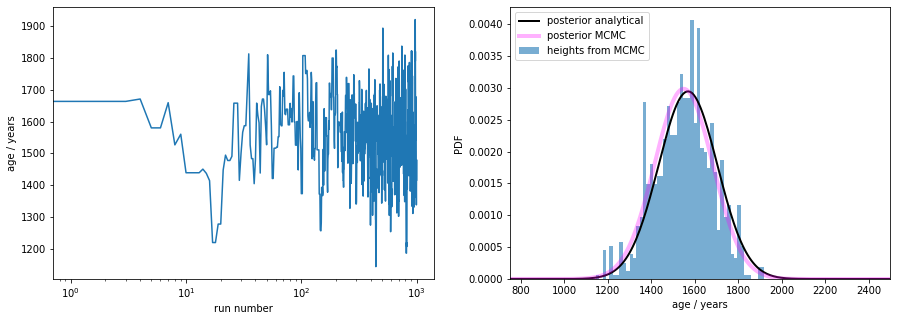

In [39]:
# tip : put the plotting routines outside the cell of the 
# MCMC otherwise you'll need to do your N runs everytime you change a plotting feature
# generate x for plotting

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(theta_current) 
plt.xlabel('run number')
plt.ylabel('age / years')
plt.xscale("log")

x = np.linspace(0,4000,500)
posterior_mcmc=norm.pdf(x, mean_mcmc, std_mcmc)

plt.subplot(122)
#plots the analytic posterior
plt.plot(x,norm.pdf(x,posterior_mean,posterior_std),label='posterior analytical',c='black',lw=2)

# plots the mcmc generated posterior
plt.hist(theta_current,bins=50,density=True,label='heights from MCMC',alpha=0.6)
plt.plot(x,posterior_mcmc,label = 'posterior MCMC',c='magenta',lw=4, alpha=0.3)
plt.legend(loc='upper left')
plt.xlim(750,2500)
plt.xlabel('age / years')
plt.ylabel('PDF')

***